Help on function DataReader in module pandas_datareader.data:

DataReader(name, data_source=None, start=None, end=None, retry_count=3, pause=0.001, session=None, access_key=None)
    Imports data from a number of online sources.
    
    Currently supports Yahoo! Finance, Google Finance, St. Louis FED (FRED),
    Kenneth French's data library, and the SEC's EDGAR Index.
    
    Parameters
    ----------
    name : str or list of strs
        the name of the dataset. Some data sources (yahoo, google, fred) will
        accept a list of names.
    data_source: {str, None}
        the data source ("yahoo", "yahoo-actions", "yahoo-dividends",
        "google", "fred", "ff", or "edgar-index")
    start : {datetime, None}
        left boundary for range (defaults to 1/1/2010)
    end : {datetime, None}
        right boundary for range (defaults to today)
    retry_count : {int, 3}
        Number of times to retry query request.
    pause : {numeric, 0.001}
        Time, in seconds, to pause

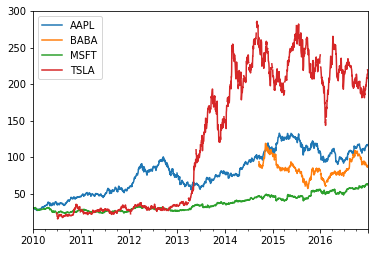

In [13]:
from pandas_datareader import data
import pandas as pd
import numpy as np
import matplotlib as plt
# display plots in the notebook
%matplotlib inline


# Define the instruments to download. We would like to see Apple, Microsoft and the S&P500 index.
tickers = ['AAPL', 'MSFT', 'BABA', 'TSLA']

# Define which online source one should use
data_source = 'google'

# We would like all available data from 01/01/2000 until 12/31/2016.
start_date = '2010-01-01'
end_date = '2016-12-31'

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
panel_data = data.DataReader(tickers, data_source, start_date, end_date)

help(data.DataReader)

# Getting just the adjusted closing prices. This will return a Pandas DataFrame
# The index in this DataFrame is the major index of the panel_data.
close = panel_data.loc['Close']

# Getting all weekdays between 01/01/2000 and 12/31/2016
all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')

# How do we align the existing prices in adj_close with our new set of dates?
# All we need to do is reindex close using all_weekdays as the new index
close = close.reindex(all_weekdays)

close.head(10)
close.plot()